Análise Exploratória 

In [1]:
import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
result = pyreadr.read_r('data/DebTrivedi.rda')
keys = list(result.keys())  # Converte as chaves em uma lista

df = result[keys[0]]
df.head()


,ofp,ofnp,opp,opnp,emer,hosp,health,numchron,adldiff,region,age,black,gender,married,school,faminc,employed,privins,medicaid
rownames,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,1,average,2,no,other,6.9,yes,male,yes,6,2.8810,yes,yes,no
2,1,0,2,0,2,0,average,2,no,other,7.4,no,female,yes,10,2.7478,no,yes,no
3,13,0,0,0,3,3,poor,4,yes,other,6.6,yes,female,no,10,0.6532,no,no,yes
4,16,0,5,0,1,1,poor,2,yes,other,7.6,no,male,yes,3,0.6588,no,yes,no
5,3,0,0,0,0,0,average,2,yes,other,7.9,no,female,yes,6,0.6588,no,yes,no


In [3]:
df = df[['ofp','hosp', 'health', 'numchron', 'gender', 'school', 'privins']]

# ofp - num de colsultas médicas
# hosp - num de internações
# health - estado de saude autopercebido
# numchron - num de condições cronicas
# gender - genero
# school - num de anos de estudo
# privins - indicador de seguro privado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4406 entries, 1 to 4406
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ofp       4406 non-null   int32   
 1   hosp      4406 non-null   int32   
 2   health    4406 non-null   category
 3   numchron  4406 non-null   int32   
 4   gender    4406 non-null   category
 5   school    4406 non-null   int32   
 6   privins   4406 non-null   category
dtypes: category(3), int32(4)
memory usage: 116.5+ KB


Histograma da variável depedente

Text(0.5, 1.0, 'Histograma variável dependente')

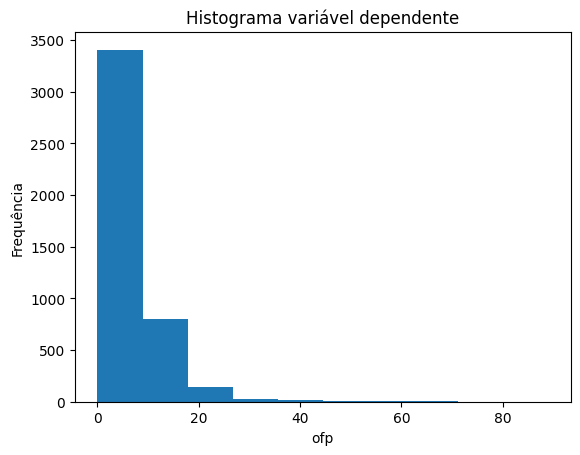

In [5]:
plt.hist(df['ofp'], bins=10)
plt.xlabel('ofp')
plt.ylabel('Frequência')
plt.title('Histograma variável dependente')


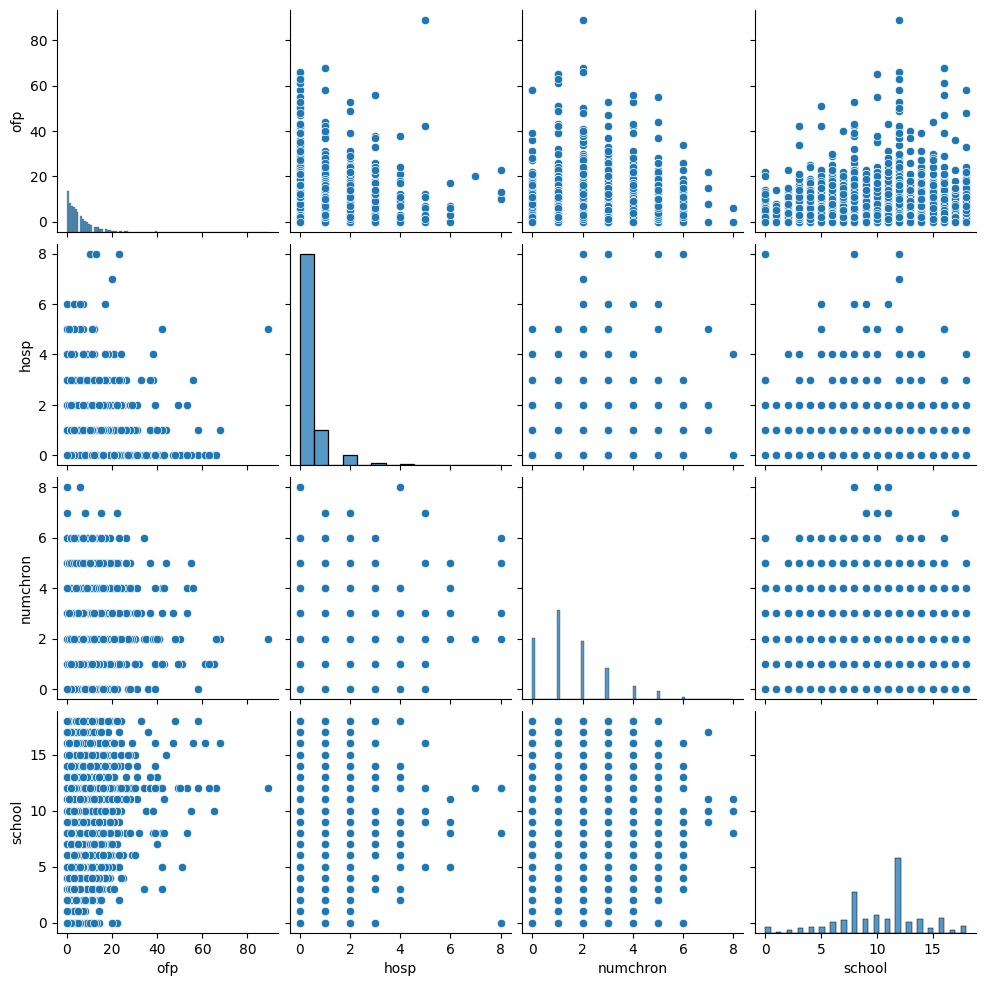

In [6]:
sns.pairplot(df)

Text(0, 0.5, 'hosp')

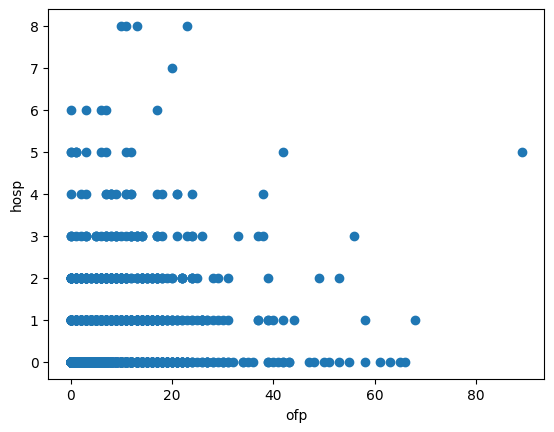

In [7]:
plt.scatter(df['ofp'], df['hosp'])
plt.xlabel('ofp')
plt.ylabel('hosp')

Text(0, 0.5, 'health')

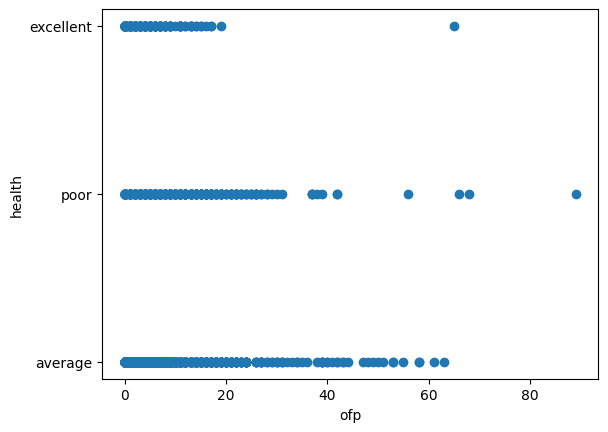

In [8]:
plt.scatter(df['ofp'], df['health'])
plt.xlabel('ofp')
plt.ylabel('health')

Text(0, 0.5, 'numchron')

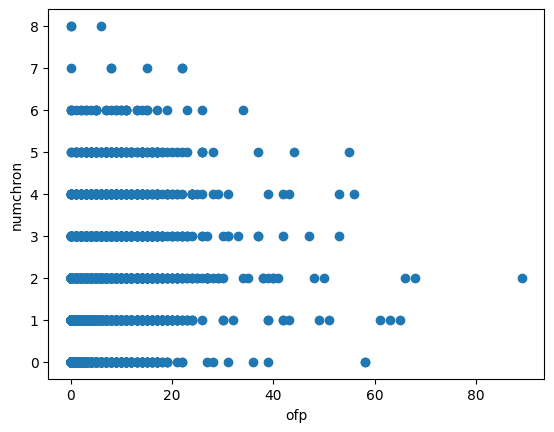

In [9]:
plt.scatter(df['ofp'], df['numchron'])
plt.xlabel('ofp')
plt.ylabel('numchron')

Text(0, 0.5, 'gender')

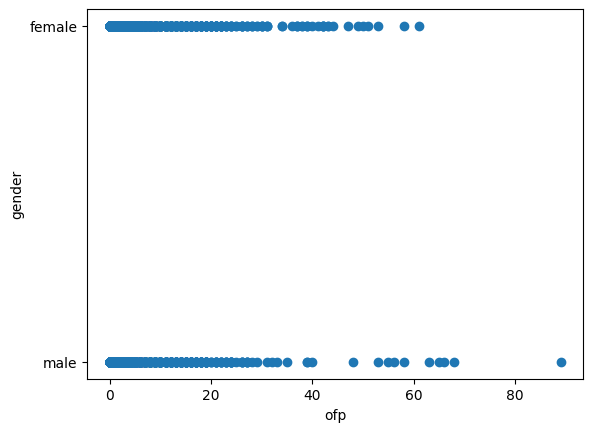

In [10]:
plt.scatter(df['ofp'], df['gender'])
plt.xlabel('ofp')
plt.ylabel('gender')

Text(0, 0.5, 'school')

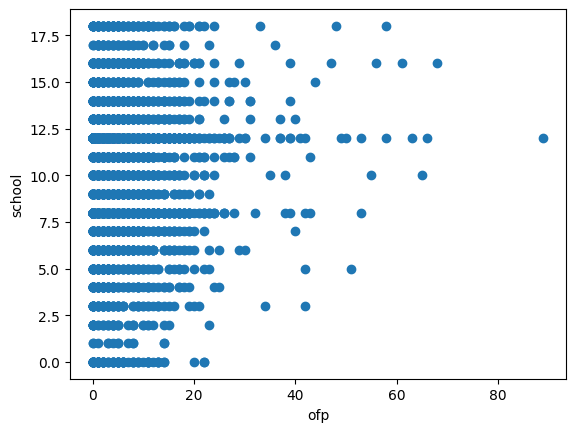

In [11]:
plt.scatter(df['ofp'], df['school'])
plt.xlabel('ofp')
plt.ylabel('school')

Text(0, 0.5, 'privins')

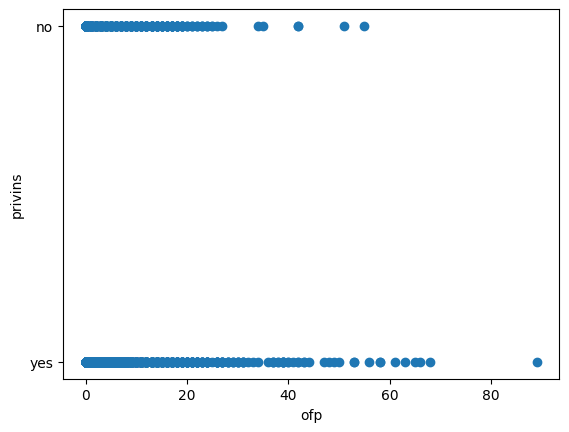

In [12]:
plt.scatter(df['ofp'], df['privins'])
plt.xlabel('ofp')
plt.ylabel('privins')

1. Podemos observar que o número de consultas é maior conforme a saúde é pior

In [13]:
print('--- average')
print(df[df['health'] == 'average']['ofp'].describe())
print('--- excellent health')
print(df[df['health'] == 'excellent']['ofp'].describe())
print('--- poor')
print(df[df['health'] == 'poor']['ofp'].describe())

--- average
count    3509.000000
mean        5.510687
std         6.309819
min         0.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        63.000000
Name: ofp, dtype: float64
--- excellent health
count    343.000000
mean       3.428571
std        4.859427
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       65.000000
Name: ofp, dtype: float64
--- poor
count    554.000000
mean       8.897112
std        9.117986
min        0.000000
25%        3.000000
50%        7.000000
75%       12.000000
max       89.000000
Name: ofp, dtype: float64


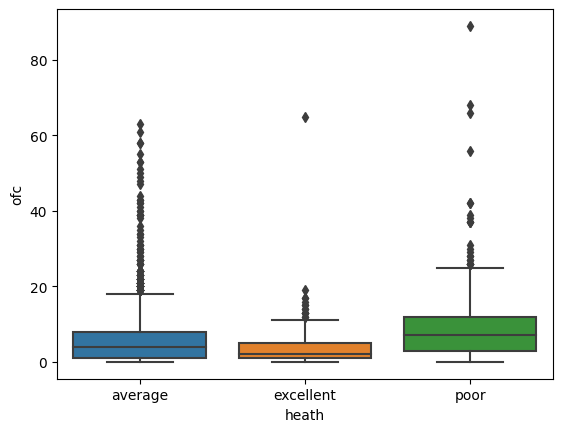

In [14]:
sns.boxplot(x='health', y='ofp', data=df)

plt.xlabel('heath')
plt.ylabel('ofc')

plt.show()

2. Convênios privados dão muito mais acesso a hospitalizações do que convênios públicos e por consequência há mais internações

In [15]:
print('--- sem convênio privado')
print(df[df['privins'] == 'no']['ofp'].describe())
print('--- com convênio privado')
print(df[df['privins'] == 'yes']['ofp'].describe())

--- sem convênio privado
count    985.000000
mean       4.912690
std        6.098488
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       55.000000
Name: ofp, dtype: float64
--- com convênio privado
count    3421.000000
mean        6.022508
std         6.918770
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        89.000000
Name: ofp, dtype: float64


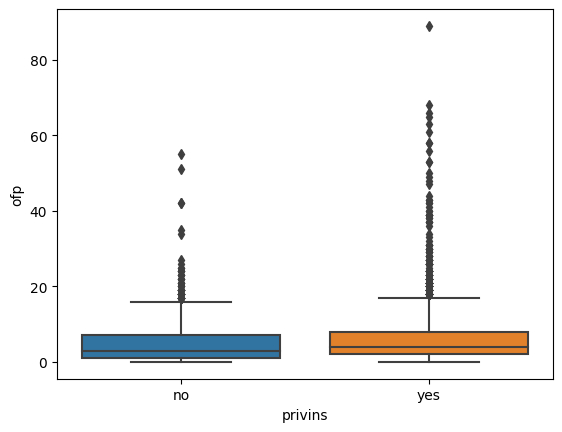

In [26]:
sns.boxplot(x='privins', y='ofp', data=df)

plt.xlabel('privins')
plt.ylabel('ofp')

plt.show()

3. Escolaridade não aumenta nem diminui

Text(0, 0.5, 'ofp')

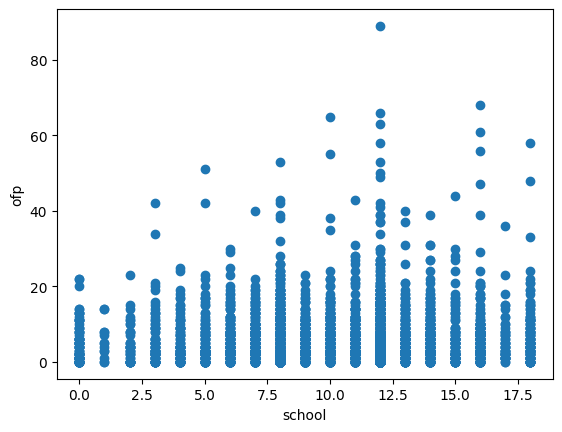

In [17]:
plt.scatter(df['school'], df['ofp'])
plt.xlabel('school')
plt.ylabel('ofp')

4. Gênero se mostra como uma variável que não afeta na OFP

In [18]:
print('--- female')
print(df[df['gender'] == 'female']['ofp'].describe())
print('--- male')
print(df[df['gender'] == 'male']['ofp'].describe())

--- female
count    2628.000000
mean        6.014079
std         6.589852
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        61.000000
Name: ofp, dtype: float64
--- male
count    1778.000000
mean        5.420135
std         6.988903
min         0.000000
25%         1.000000
50%         4.000000
75%         7.000000
max        89.000000
Name: ofp, dtype: float64


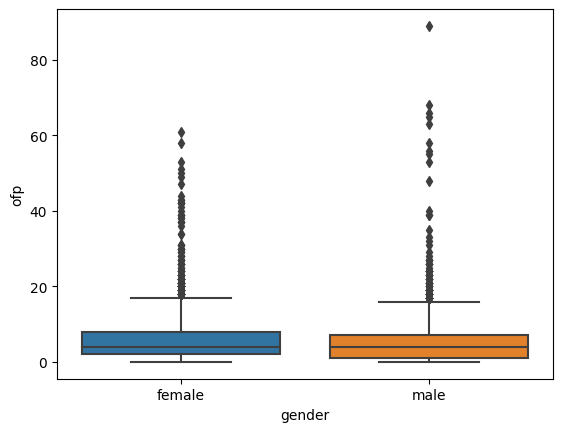

In [19]:
sns.boxplot(x='gender', y='ofp', data=df)

plt.xlabel('gender')
plt.ylabel('ofp')

plt.show()

<h2>Regressão de Poisson</h2>

In [20]:
from scipy.stats import poisson
import statsmodels.api as sm

In [21]:
df.dtypes

ofp            int32
hosp           int32
health      category
numchron       int32
gender      category
school         int32
privins     category
dtype: object

In [22]:
colunasString = df.select_dtypes(include='category').columns.values
colunasString

array(['health', 'gender', 'privins'], dtype=object)

In [23]:
dft= pd.concat([df.drop(colunasString, axis=1),
                      pd.get_dummies(df[colunasString], prefix=colunasString)], axis=1)

dft.columns

Index(['ofp', 'hosp', 'numchron', 'school', 'health_average',
       'health_excellent', 'health_poor', 'gender_female', 'gender_male',
       'privins_no', 'privins_yes'],
      dtype='object')

In [24]:
colunasS = ['health_average','health_excellent', 'health_poor', 'gender_female', 'gender_male',
       'privins_no', 'privins_yes']
for coluna in colunasS:
    dft[coluna] = dft[coluna].astype(int)

In [25]:
# Criar o modelo de regressão de Poisson
model = sm.GLM(dft['ofp'], dft.drop('ofp', axis=1), family=sm.families.Poisson())

# Ajustar o modelo aos dados
result = model.fit()

# Imprimir os resultados da regressão
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    ofp   No. Observations:                 4406
Model:                            GLM   Df Residuals:                     4398
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17972.
Date:                Thu, 06 Jul 2023   Deviance:                       23168.
Time:                        11:31:22   Pearson chi2:                 2.95e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5755
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
hosp                 0.1648      0.006  